In [45]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [46]:
pwd

'C:\\Users\\Esther'

In [47]:
variable = pd.read_csv(r"C:\Users\Esther\Desktop\Thoko CodSoft Internship\IMDb Movies India.csv", encoding='windows-1252')
variable

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
variable.tail(5)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [49]:
variable.shape

(15509, 10)

In [50]:
variable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [51]:
print("Any missing value?", variable.isnull().values.any())

Any missing value? True


In [52]:
variable.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

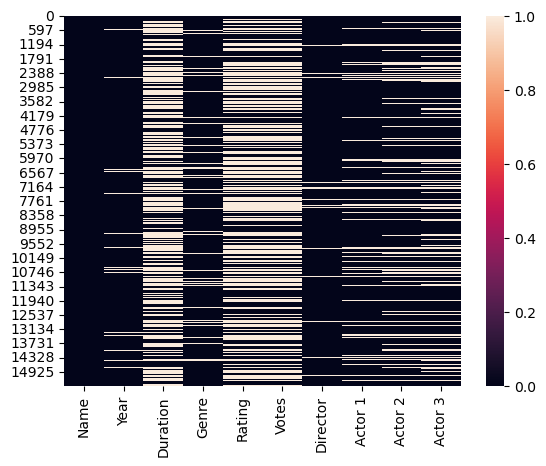

In [53]:
sns.heatmap(variable.isnull())

In [54]:
percentage_missing=variable.isnull().sum()*100/len(variable)
print(percentage_missing)

Name         0.000000
Year         3.404475
Duration    53.317429
Genre       12.102650
Rating      48.939326
Votes       48.932878
Director     3.385131
Actor 1     10.426204
Actor 2     15.371720
Actor 3     20.272100
dtype: float64


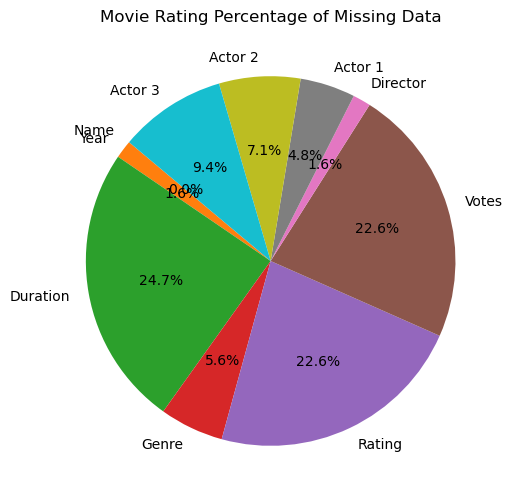

In [55]:
plt.figure(figsize=(8, 6))
plt.pie(percentage_missing, labels=percentage_missing.index, autopct='%1.1f%%', startangle=140)
plt.title('Movie Rating Percentage of Missing Data')
plt.show()


In [56]:
duplicates=variable.duplicated().any()
print("Are there any duplicate values?",duplicates)

Are there any duplicate values? True


In [57]:
variable.duplicated().sum()

6

In [58]:
variable.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [59]:
variable.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [60]:
print(variable.dtypes)

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object


In [20]:
print(variable['Year'].isnull().sum())
print(variable['Votes'].isnull().sum())

527
7583


In [21]:
high_rating_movies = variable[variable['Rating'] > 8.5]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
967,An Insignificant Man,(2016),96 min,"Documentary, Thriller",8.7,"1,928",Khushboo Ranka,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj
1314,Ashok Vatika,(2018),97 min,Drama,9.3,7,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,(2018),127 min,Drama,8.8,5,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
1432,Awasaan,(2020),101 min,Drama,8.7,21,Rajat Kumar Chaturvedi,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain
1469,B for Bundelkhand,(2017),117 min,Drama,8.8,5,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
...,...,...,...,...,...,...,...,...,...,...
14861,Vidyoday,(2018),108 min,Documentary,9.2,35,Vidhi Kasliwal,Aarti S. Bagdi,Alok Nath,NaN
14898,Viraat,(2021),150 min,Crime,8.9,294,Narendra Singh,Kritika Sachdeva,Ravi Jhanghu,Lokesh Tilakdhari
15071,Win Marathon,(2018),94 min,"Drama, Sport",9.0,70,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna
15199,Yatrik,(1952),NaN,Drama,8.8,8,Kartick Chattopadhyay,Vasant Choudhury,Arundhati Devi,Tulsi Chakraborty


In [22]:
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
11,10.0,1
10,9.7,1
9,9.6,1
8,9.4,4
7,9.3,9
6,9.2,3
5,9.1,9
4,9.0,12
3,8.9,10
2,8.8,11


In [69]:

# Sample DataFrame (replace with your actual data)
data = {'Name': ['Movie A', np.nan, 'Movie C', 'Movie D'],
        'Year': [2020, 2021, np.nan, 2023],
        'Duration': [120, 150, np.nan, 100],
        'Genre': ['Action', 'Comedy', 'Drama', np.nan],
        'Rating': [4.5, np.nan, 3.8, 4.2],
        'Votes': [1000, 1500, np.nan, 800],
        'Director': ['John Doe', np.nan, 'Jane Smith', 'David Lee'],
        'Actor 1': ['Actor A', 'Actor B', np.nan, 'Actor D'],
        'Actor 2': [np.nan, 'Actor E', 'Actor F', 'Actor G'],
        'Actor 3': ['Actor H', 'Actor I', 'Actor J', np.nan]}
df = pd.DataFrame(data)

# Columns to impute with mean 
columns_to_impute_mean = ['Duration', 'Votes', 'Rating'] 

# Impute missing values in specified columns with their respective means
for col in columns_to_impute_mean:
    variable[col].fillna(variable[col].mean(), inplace=True) 

# Handle missing values in other columns 
for col in ['Name', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre']: 
    df[col].fillna('Unknown', inplace=True) 

# Handle missing values in 'Year' (example: using median)
variable['Year'].fillna(variable['Year'].median(), inplace=True) 

# Check for remaining missing values
print(variable.isnull().sum()) 

print(variable) 

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64
      Name    Year    Duration    Genre    Rating   Votes    Director  \
0  Movie A  2020.0  120.000000   Action  4.500000  1000.0    John Doe   
1  Unknown  2021.0  150.000000   Comedy  4.166667  1500.0     Unknown   
2  Movie C  2021.0  123.333333    Drama  3.800000  1100.0  Jane Smith   
3  Movie D  2023.0  100.000000  Unknown  4.200000   800.0   David Lee   

   Actor 1  Actor 2  Actor 3  
0  Actor A  Unknown  Actor H  
1  Actor B  Actor E  Actor I  
2  Unknown  Actor F  Actor J  
3  Actor D  Actor G  Unknown  


In [70]:
variable.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,4,4.000000,4.000000,4,4.000000,4.000000,4,4,4,4
unique,4,NaN,NaN,4,NaN,NaN,4,4,4,4
top,Movie A,NaN,NaN,Action,NaN,NaN,John Doe,Actor A,Unknown,Actor H
freq,1,NaN,NaN,1,NaN,NaN,1,1,1,1
mean,NaN,2021.250000,123.333333,NaN,4.166667,1100.000000,NaN,NaN,NaN,NaN
std,NaN,1.258306,20.548047,NaN,0.286744,294.392029,NaN,NaN,NaN,NaN
min,NaN,2020.000000,100.000000,NaN,3.800000,800.000000,NaN,NaN,NaN,NaN
25%,NaN,2020.750000,115.000000,NaN,4.075000,950.000000,NaN,NaN,NaN,NaN
50%,NaN,2021.000000,121.666667,NaN,4.183333,1050.000000,NaN,NaN,NaN,NaN
75%,NaN,2021.500000,130.000000,NaN,4.275000,1200.000000,NaN,NaN,NaN,NaN


In [71]:
x = variable[['Year', 'Votes', 'Duration', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']]
y = variable['Rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [72]:
train_data= x_train.join(y_train)
train_data




,Year,Votes,Duration,Director,Actor 1,Actor 2,Actor 3,Rating
3,2023.0,800.0,100.000000,David Lee,Actor D,Actor G,Unknown,4.2
0,2020.0,1000.0,120.000000,John Doe,Actor A,Unknown,Actor H,4.5
2,2021.0,1100.0,123.333333,Jane Smith,Unknown,Actor F,Actor J,3.8


In [73]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(3, 7) (1, 7) (3,) (1,)


In [74]:
model = RandomForestRegressor() 

In [75]:
y_train = y_train[pd.to_numeric(y_train, errors='coerce').notnull()] 

In [76]:
unique_values = variable['Year'].unique()
print(unique_values)
    

[2020. 2021. 2023.]


In [78]:
import numpy as np
Year = [np.nan, '(2019)', '(2021)', '(2010)', '(1997)', '(2005)', '(2008)', '(2012)',
         '(2014)', '(2004)', '(2016)', '(1991)', '(1990)', '(2018)', '(1987)', '(1948)',
         '(1958)', '(2017)', '(2020)', '(2009)', '(2002)', '(1993)', '(1946)', '(1994)',
         '(2007)', '(2013)', '(2003)', '(1998)', '(1979)', '(1951)', '(1956)', '(1974)',
         '(2015)', '(2006)', '(1981)', '(1985)', '(2011)', '(2001)', '(1967)', '(1988)',
         '(1995)', '(1959)', '(1996)', '(1970)', '(1976)', '(2000)', '(1999)', '(1973)',
         '(1968)', '(1943)', '(1953)', '(1986)', '(1983)', '(1989)', '(1982)', '(1977)',
         '(1957)', '(1950)', '(1992)', '(1969)', '(1975)', '(1947)', '(1972)', '(1971)',
         '(1935)', '(1978)', '(1960)', '(1944)', '(1963)', '(1940)', '(1984)', '(1934)',
         '(1955)', '(1936)', '(1980)', '(1966)', '(1949)', '(1962)', '(1964)', '(1952)',
         '(1933)', '(1942)', '(1939)', '(1954)', '(1945)', '(1961)', '(1965)', '(1938)',
         '(1941)', '(1931)', '(1937)', '(2022)', '(1932)', '(1923)', '(1915)', '(1928)',
         '(1922)', '(1917)', '(1913)', '(1930)', '(1926)', '(1914)', '(1924)']


In [79]:
cleaned_years = []
for Year in Year:
    if pd.notna(Year): 
        cleaned_year = str(Year).strip('()')  
        try:
            cleaned_years.append(int(cleaned_year)) 
        except ValueError:
            print(f"Could not convert '{Year}' to a number. Appending as is.")
            cleaned_years.append(year)  
    else:
        cleaned_years.append(np.nan) 

variable= pd.DataFrame({'Year': cleaned_years}) 

print(variable.head())
print(variable.info()) 



     Year
0     NaN
1  2019.0
2  2021.0
3  2010.0
4  1997.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    102 non-null    float64
dtypes: float64(1)
memory usage: 956.0 bytes
None


In [80]:
unique_values = variable['Year'].unique()
print(unique_values)


[  nan 2019. 2021. 2010. 1997. 2005. 2008. 2012. 2014. 2004. 2016. 1991.
 1990. 2018. 1987. 1948. 1958. 2017. 2020. 2009. 2002. 1993. 1946. 1994.
 2007. 2013. 2003. 1998. 1979. 1951. 1956. 1974. 2015. 2006. 1981. 1985.
 2011. 2001. 1967. 1988. 1995. 1959. 1996. 1970. 1976. 2000. 1999. 1973.
 1968. 1943. 1953. 1986. 1983. 1989. 1982. 1977. 1957. 1950. 1992. 1969.
 1975. 1947. 1972. 1971. 1935. 1978. 1960. 1944. 1963. 1940. 1984. 1934.
 1955. 1936. 1980. 1966. 1949. 1962. 1964. 1952. 1933. 1942. 1939. 1954.
 1945. 1961. 1965. 1938. 1941. 1931. 1937. 2022. 1932. 1923. 1915. 1928.
 1922. 1917. 1913. 1930. 1926. 1914. 1924.]


In [81]:
variable=variable.dropna()



In [82]:
variable.info()


<class 'pandas.core.frame.DataFrame'>
Index: 102 entries, 1 to 102
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    102 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [83]:
print(variable.dtypes)


Year    float64
dtype: object


In [84]:
def top_movies_per_year(variable, n=10):
    return variable.groupby('Year').apply(lambda x: x.nlargest(n, 'Rating'))


In [85]:
x = variable.drop(columns=['Year'])
y = variable['Year']

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [87]:
model = LinearRegression()

In [88]:
model.fit(x_train, y_train)

ValueError: at least one array or dtype is required